In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


titanic_df=pd.read_csv('C:/Users/castl/Desktop/2020_job_academy/machine_learning/titanic_train.csv')
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
#컬럼타입 확인
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [65]:
#null값 처리- Age는 평균 나이로, Cabin은 고정값'N', Embared는 고정값'N'으로 변경'

titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null값 갯수',titanic_df.isnull().sum().sum())

#문자열 feature 값 분포 확인
print('Sex 특성값 분포:',titanic_df['Sex'].value_counts())
print('Cabin 특성값 분포:',titanic_df['Cabin'].value_counts())
print('Embarked 특성값 분포:',titanic_df['Embarked'].value_counts())

데이터 세트 Null값 갯수 0
Sex 특성값 분포: male      577
female    314
Name: Sex, dtype: int64
Cabin 특성값 분포: N              687
B96 B98          4
C23 C25 C27      4
G6               4
C22 C26          3
              ... 
D28              1
A10              1
A34              1
A24              1
C90              1
Name: Cabin, Length: 148, dtype: int64
Embarked 특성값 분포: S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [66]:
#Cabin 특성값의 앞문자만 추출해서 다시 Cabin특성값으로 저장
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())


0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [67]:
#성별이 생존 확률에 어떤 영향을 주었는지, 성별에 따른 생존자 수를 비교를 위해 barplot으로 시각화
titanic_df.groupby(['Sex','Survived'])['Survived'].count()


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

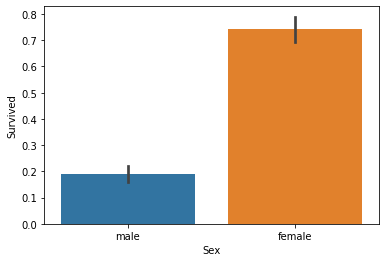

In [5]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

In [69]:
#1등실, 2등실,3등실 사람간의 생존 확률
titanic_df.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

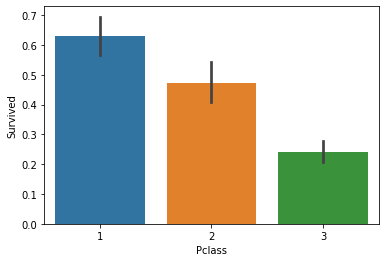

In [6]:
titanic_df

sns.barplot(x='Pclass',y='Survived',data=titanic_df)

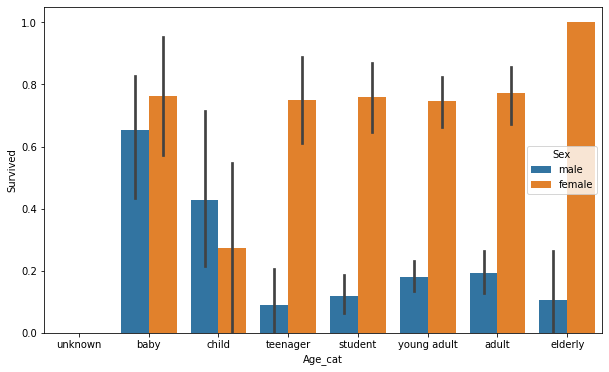

In [71]:
#Age에 따른 생존 확률 확인
#Age 범주화
def get_category(age):
    cat=''
    if age <=-1: cat='unknown'
    elif age<=5: cat='baby'
    elif age<=12: cat='child'
    elif age<=18: cat='teenager'
    elif age<=25: cat='student'
    elif age<=35: cat='young adult'
    elif age<=60: cat='adult'
    else:
        cat='elderly'
    
    return cat
plt.figure(figsize=(10,6))
group_names=['unknown','baby','child','teenager','student','young adult','adult','elderly']

titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x:get_category(x))
sns.barplot(x='Age_cat',y='Survived',hue='Sex',data=titanic_df,order=group_names)

titanic_df.drop('Age_cat',axis=1,inplace=True)


In [72]:
#Sex, Cabin,Embarked 문자열 범주 특성을 LabelEncoder를 사용하여 숫자 범주 특성으로 변환

from sklearn.preprocessing import LabelEncoder

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        
    return dataDF

titanic_df=encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [73]:
#NUll처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    
    return df


#머신러닝 알고리즘에 불필요한 속성 제거 함수(passengerid, Name,Ticket)
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df


def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features= ['Cabin','Sex','Embarked']
    for feature in features:
        le=LabelEncoder()
        le=le.fit(df[feature])
        df[feature]=le.transform(df[feature])
        
    return df

def transform_feature(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [74]:
titanic_df=pd.read_csv('C:/Users/castl/Desktop/2020_job_academy/machine_learning/titanic_train.csv')
x_titanic_df=titanic_df.drop('Survived',axis=1)
y_titanic_df=titanic_df['Survived']

x_titanic_df=transform_feature(x_titanic_df)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x_titanic_df,y_titanic_df,test_size=0.2,random_state=11)

In [75]:
#랜덤 포레스트, 의사결정트리, 로지스틱 회귀 분류의 정확도 비교

#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

dt_clf.fit(x_train, y_train)
df_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:0.4f}'.format(accuracy_score(y_test, df_pred)))


rf_clf.fit(x_train, y_train)
rf_pred = rf_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:0.4f}'.format(accuracy_score(y_test, rf_pred)))

lr_clf.fit(x_train, y_train)
lr_pred = lr_clf.predict(x_test)
print('LogisticRegression 정확도: {0:0.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [76]:
#데이터 양이 충분하지 않고, 최적화 작업을 수행하지 않았음으로 교차 검증으로 결정 트리 모델을 좀더 평가

def exec_kfold(clf, folds = 5):
    kfold = KFold(n_splits=folds)
    scores=[]
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

    mean_score = np.mean(scores)  #5개 fold의 평균 정확도
    print("평균 정확도: {0:.4f}".format(mean_score))

exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [77]:
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.8090
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8148


In [78]:
exec_kfold(lr_clf, folds=5)

교차 검증 0 정확도: 0.8045
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7584
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7890


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_

In [79]:
#confusion matrix - 정확도, 정밀도, 재현율  cross_val_score
from sklearn.model_selection import cross_val_score

def exec_cross_val_score(clf, folds = 5) : 
    scores = cross_val_score(clf, x_titanic_df, y_titanic_df, cv=folds)
    for iter_count, accuracy in enumerate(scores):
        print("교차 검증 {0} 정확도 :{1:.4f}".format(iter_count, accuracy))

    print("평균 정확도 : {0:.4f}".format(np.mean(scores)))

exec_cross_val_score(dt_clf, folds=5)

교차 검증 0 정확도 :0.7430
교차 검증 1 정확도 :0.7753
교차 검증 2 정확도 :0.7921
교차 검증 3 정확도 :0.7865
교차 검증 4 정확도 :0.8427
평균 정확도 : 0.7879


In [80]:
exec_cross_val_score(rf_clf, folds=5)

교차 검증 0 정확도 :0.7933
교차 검증 1 정확도 :0.7978
교차 검증 2 정확도 :0.8483
교차 검증 3 정확도 :0.7640
교차 검증 4 정확도 :0.8652
평균 정확도 : 0.8137


In [81]:
exec_cross_val_score(lr_clf, folds=5)

교차 검증 0 정확도 :0.7989
교차 검증 1 정확도 :0.7697
교차 검증 2 정확도 :0.7809
교차 검증 3 정확도 :0.7753
교차 검증 4 정확도 :0.7978
평균 정확도 : 0.7845


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_